In [5]:
#import essential packages
import pandas as pd
pd.set_option('display.max_columns', None)

import numpy as np
import datetime as dt

#import visualization packages
# import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [7]:
import os
cwd = os.getcwd()
cwd

'C:\\Users\\kuka\\Desktop\\Data Enterprise\\Aitue\\inmobiliaria'

In [8]:

#read in both cotizaciones and negocios data
#merge df´s so we only have one df for cotizaciones and one for negocios
#altos
altos_coti = pd.read_excel("AltosDelValle_Cotizaciones.xlsx")
altos_nego = pd.read_excel("AltosDelValle_Negocios.xlsx")

#junge
junge_coti = pd.read_excel("Junge_Cotizaciones.xlsx")
junge_nego = pd.read_excel("Junge_Negocios.xlsx")

#mil610
mil_coti = pd.read_excel("Mil610_Cotizaciones.xlsx")
mil_nego = pd.read_excel("Mil610_Negocios.xlsx")

features_altos_coti = altos_coti.columns
features_junge_coti = junge_coti.columns
features_mil_coti = mil_coti.columns

data_coti =altos_coti.append(junge_coti).append(mil_coti)
data_nego = altos_nego.append(junge_nego).append(mil_nego)

In [9]:

data_coti.head()

# ID = remove as it does not provide a basis for matching 
# Fecha Cotizacion = breakdown into year, month, day / DONE
# Medio = aggregate (FINCO, LETREROS, EVENTOS, PRENSA,REVISTAS, VOLANTES) into one label called 'marketing', because of low observations // DONE
# Tipo de Medio = subcategory of 'Medio'. see if aggregation makes sense. Deciding granurality of this feature is maybe key // DROPPED because sub category to fine granulated
# Proyecto = Can be onehot encoded // DONE 
# Etapa = Find  way to merge 'Projecto and etapa as is only relevant for 'Quinta Junge' Project / DONE one hot encoded - probably not usable together with PROYECTO: i think only one of them can go in the model
# Productos = idea <- count commas in the variable to provide the sum of product seen by the prospect and break down to dummy products // DONE a
# Presencial, Remoto = code in binary // DONE


# Jefe Comercial, Ejecutivo Comercial = code as category <- could be onehotencoded aswell depending on algotrithm
# Total Productos = leave it such as it is - standarize with min-max?
# Descuentos = there are not many observation with a discount. Code binary for yes/no?
# Valor final Venta = do the same as 'Total Productos'. Decide wich one to leave in.
# RUT = is provided yes/no
# Nombre, Apellido1, Apellido2 = remove as Nombre completo is enough
# Telefono, Celular = provided yes/no 
# Direccion = Decide if some sort of segmentatino can be done to this. if not sufficient we can crawl the rigth adress from SII site
# Region = code into 'Bio-Bio' , 'Santiago' and 'Otros' as not many observations in rest of regions
# Provincia = same idea as in 'Region'
# Comuna = same idea as in 'Region'
# Correo Electronico = provided yes/no
# Sexo = m/f
# Estado Civil = some categories are redundant. they have to be aggregated
# Rango Edad, Fecha Nacimiento = merge into one variable. Age range makes the most sin as is already binned.
# Profesion = this feature could prove important if diferent profession are aggregated to categories like Health, Engineering, etc.




,ID,Fecha Cotizacion,Medio,Tipo de Medio,Proyecto,Etapa,Productos,Presencial,Remoto,Jefe Comercial,Ejecutivo Comercial,Total Productos,Descuentos,Valor Final Venta,RUT,Nombre,Apellido 1,Apellido 2,Nombre Completo,Telefono,Celular,Direccion,Region,Provincia,Comuna,Correo Electronico,Sexo,Estado Civil,Rango Edad,Fecha Nacimiento,Profesion
0,125182,2018-01-22 14:10:05.000,INTERNET,Portal Inmobiliario,Altos del Valle,ADV - Etapa 1,TA-103,No,Si,Alejandra Pooley Flores,Silvana Lobos Pardo,3001.0,0.0,3001.0,18445077-1,Yohanna Constanza,Gonzalez,Saavedra,Constanza Gonzalez Saavedra,NaN,974797092,Santa clara,VIII Región del Bío-Bío,Concepción,Concepción,constanza.gonzalez.saavedra@gmail.com,Femenino,Sin Información,31-40,2017-04-28,Otro
1,125183,2018-01-22 14:11:57.000,INTERNET,Portal Inmobiliario,Altos del Valle,ADV - Etapa 1,TA-103,No,Si,Alejandra Pooley Flores,Silvana Lobos Pardo,3001.0,0.0,3001.0,11912832-3,Ines,Henriquez,Romero,Ines Henriquez Romero,NaN,56688038,NaN,VIII Región del Bío-Bío,Concepción,Concepción,ineshen@hotmail.com,Femenino,Sin Información,31-40,NaT,NaN
2,125184,2018-01-22 14:14:55.000,INTERNET,Portal Inmobiliario,Altos del Valle,ADV - Etapa 1,TA-102,No,Si,Alejandra Pooley Flores,Silvana Lobos Pardo,3495.0,0.0,3495.0,15328933-6,MARGARITA,MONTECINOS,L,MARGARITA MONTECINOS L,NaN,569-88947532,NaN,VIII Región del Bío-Bío,Concepción,Concepción,MARMONTECINOS.LENSE@GMAIL.COM,NaN,NaN,NaN,NaT,NaN
3,125187,2018-01-22 14:21:40.000,INTERNET,Portal Inmobiliario,Altos del Valle,ADV - Etapa 1,TA-104,No,Si,Alejandra Pooley Flores,Silvana Lobos Pardo,1906.0,0.0,1906.0,11778773-7,Fabiola Del Carmen,Gajardo,Calbucoy,Fabiola Del Carmen Gajardo Calbucoy,NaN,998896667,NaN,VIII Región del Bío-Bío,Concepción,Concepción,faby70@gmail.com,NaN,NaN,NaN,NaT,NaN
4,125188,2018-01-22 14:34:07.000,INTERNET,Portal Inmobiliario,Altos del Valle,ADV - Etapa 1,TA-103,No,Si,Alejandra Pooley Flores,Silvana Lobos Pardo,3001.0,0.0,3001.0,17344245-9,Claudia Sibyl,Sobino,Guzman,Claudia Sibyl Sobino Guzman,NaN,84433280,Arauco 1741,VIII Región del Bío-Bío,Concepción,Concepción,claudiasobinog@gmail.com,Femenino,Sin Información,Sin Información,NaT,NaN


In [10]:
data_coti.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2962 entries, 0 to 1718
Data columns (total 31 columns):
ID                     2962 non-null int64
Fecha Cotizacion       2962 non-null object
Medio                  2962 non-null object
Tipo de Medio          2825 non-null object
Proyecto               2962 non-null object
Etapa                  2962 non-null object
Productos              2921 non-null object
Presencial             2962 non-null object
Remoto                 2961 non-null object
Jefe Comercial         2962 non-null object
Ejecutivo Comercial    2962 non-null object
Total Productos        2962 non-null float64
Descuentos             2934 non-null float64
Valor Final Venta      2934 non-null float64
RUT                    2962 non-null object
Nombre                 2962 non-null object
Apellido 1             2945 non-null object
Apellido 2             2939 non-null object
Nombre Completo        2962 non-null object
Telefono               642 non-null object
Celular     

In [13]:
data_coti['RUT'].value_counts()

9560501-k     20
6522564-6     18
6942556-9     16
16152006-3    16
17513727-0    16
2983804-6     16
7527187-5     15
15160207-K    13
7553349-7     13
6583598-3     13
17176994-9    12
13725016-0    11
15853578-5    11
15590618-9    11
10842892-9    10
17348813-0    10
6411534-0     10
17044830-8     9
13510967-3     9
18158539-0     9
25296872-5     9
13147372-9     9
12974804-4     9
8193470-3      9
15647628-5     9
5521633-9      9
13393044-2     8
17688758-3     8
16218115-7     8
14030103-5     8
              ..
9833932-9      1
18636702-2     1
15866314-7     1
18405012-9     1
16356800-4     1
15592584-1     1
7758729-2      1
16767939-0     1
16052041-8     1
9174461-9      1
17346168-2     1
13672835-0     1
16980648-9     1
16896809-4     1
15593206-6     1
6965850-4      1
13307713-8     1
17346561-1     1
16708640-3     1
17344691-8     1
17224457-2     1
5344995-6      1
11593012-5     1
16154080-3     1
9725751-5      1
12667429-5     1
16158888-1     1
12115017-4    

In [473]:
#set time variables to right format
data_coti['Fecha Cotizacion'] = pd.to_datetime(data_coti['Fecha Cotizacion'])
#separate datetome components of 'cotizacion'
data_coti['Year Cotizacion'], data_coti['Month Cotizacion'], data_coti['Week Cotizacion'], data_coti['Day Cotizacion'] = data_coti['Fecha Cotizacion'].dt.year, data_coti['Fecha Cotizacion'].dt.month, data_coti['Fecha Cotizacion'].dt.week, data_coti['Fecha Cotizacion'].dt.day

data_coti.drop( labels = 'Fecha Cotizacion',  axis =1, inplace = True)

cols = data_coti.columns.tolist()
cols = cols[:1] + cols[-4:] + cols[1:-4]
data_coti = data_coti[cols]



data_coti.head(1)

,ID,Year Cotizacion,Month Cotizacion,Week Cotizacion,Day Cotizacion,Medio,Tipo de Medio,Proyecto,Etapa,Productos,Presencial,Remoto,Jefe Comercial,Ejecutivo Comercial,Total Productos,Descuentos,Valor Final Venta,RUT,Nombre,Apellido 1,Apellido 2,Nombre Completo,Telefono,Celular,Direccion,Region,Provincia,Comuna,Correo Electronico,Sexo,Estado Civil,Rango Edad,Fecha Nacimiento,Profesion
0,125182,2018,1,4,22,INTERNET,Portal Inmobiliario,Altos del Valle,ADV - Etapa 1,TA-103,No,Si,Alejandra Pooley Flores,Silvana Lobos Pardo,3001.0,0.0,3001.0,18445077-1,Yohanna Constanza,Gonzalez,Saavedra,Constanza Gonzalez Saavedra,NaN,974797092,Santa clara,VIII Región del Bío-Bío,Concepción,Concepción,constanza.gonzalez.saavedra@gmail.com,Femenino,Sin Información,31-40,2017-04-28,Otro


In [474]:
#MEDIO
data_coti['Medio'] = data_coti['Medio'].apply(lambda x: 'MARKETING' if x in ['FINCO','LETREROS','EVENTOS','PRENSA','REVISTAS','VOLANTES' ] else x )

In [475]:
#TIPO DE MEDIO
data_coti['Tipo de Medio'].value_counts()

Paseo                               1391
Recontacto                          434 
Web Aitue                           412 
Portal Inmobiliario                 139 
Tercero                             79  
Letreros                            64  
Mailing                             56  
Base Finco 2018                     48  
Cliente Aitue de otro proyecto      34  
Base Finco 2017                     33  
Google                              32  
Eventos                             25  
Cliente Aitue del mismo proyecto    17  
Enlace Bio Bio                      13  
Diarios                             7   
Facebook                            7   
G-Leads                             7   
Revistas                            7   
El Inmobiliario                     6   
Base Finco 2016                     5   
Boulevard Inmobiliario              4   
Enlace Inmobiliario                 4   
Volantes                            1   
Name: Tipo de Medio, dtype: int64

In [476]:
#funct to append a dummy enconding for a variable and removing it while using the variable name as preffix

def dummies(df, var):
    df = df.copy()
    temp =  pd.get_dummies(df[var], prefix = var)
    df = pd.concat([df, temp], axis = 1)
    df.drop( labels = var,  axis =1, inplace = True)
    
    return df
    


In [477]:
#PROYECTO
data_coti =  dummies(data_coti ,"Proyecto")


In [478]:
#ETAPA
temp = dummies(data_coti, 'Etapa')

In [479]:
#PRODUCTOS
#count the commas 
def count_products(data, variable):
    
    num_products = []

    for i in data[variable]:
        temp= str(i).count(',') + 1 # values of '0' are in fact one, thats why the +1 at the end
        num_products.append(temp)
           
    return(num_products)

data_coti['Cantidad Productos'] = count_products(data_coti, 'Productos')

In [492]:
#isolate products type {TORRE; BODEGA; ESTACIONAMIENTO}

# thoughts: what happens if a customer is shown more than one? is this relevant? // what to do with NaNs and an obsservation with only '43'

def isolate_products(data, variable):
    
    Torre =[]
    Bodega = []
    Estacionamiento = []
    
    for i in data[variable]:
        #Torre
        if 'T' in str(i):
            match = 1
            Torre.append(match)
        else:
            match = 0
            Torre.append(match)
        #Estacionamiento
        if 'Est' in str(i):
            match = 1
            Estacionamiento.append(match)
        else:
            match = 0
            Estacionamiento.append(match)    
        #Bodega
        if 'Bod' in str(i):
            match = 1
            Bodega.append(match)
        else:
            match = 0
            Bodega.append(match)   
    
    
    
    df = pd.DataFrame({
     'Torre':Torre,
     'Estacionamiento':Estacionamiento,
     'Bodega':Bodega
    })
    
    order = ['Torre', 'Bodega', 'Estacionamiento']
    df = df[order]
    
    #THIS CREATES A NEW VARIABLE CALL OTROS FOR CASES WHICH DONT MEET CRITERIA FOR CATEGORIES
    df['Otro Producto'] = 0

    for rows in range(len(df.index)):
        if (df['Torre'][rows] == 0 and df['Estacionamiento'][rows] == 0 and  df['Bodega'][rows] == 0):
            df['Otro Producto'][rows] = 1
        else:
            df['Otro Producto'][rows] = 0
    
    #JOIN BOTH ORIGINAL DATAFRAME AND DF
    
    df = data.join(df)
    
    return(df)
            
    
#WHERE THE MAGIC HAPPENS
data_coti   = isolate_products(data_coti, 'Productos')   


In [501]:
#PRESENCIAL
#REMOTO

data_coti['Presencial'] = data_coti['Presencial'].apply(lambda x: 0 if x == 'No' else 1)

data_coti['Remoto'] = data_coti['Remoto'].apply(lambda x: 0 if x == 'No' else 1)

In [102]:
data_nego['Sexo'] = data_nego['Sexo'].apply(lambda x: 0 if x == 'Masculino' else 1)
data_coti['Sexo'] = data_coti['Sexo'].apply(lambda x: 0 if x == 'Masculino' else 1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2962 entries, 0 to 1718
Data columns (total 31 columns):
ID                     2962 non-null int64
Fecha Cotizacion       2962 non-null object
Medio                  2962 non-null object
Tipo de Medio          2825 non-null object
Proyecto               2962 non-null object
Etapa                  2962 non-null object
Productos              2921 non-null object
Presencial             2962 non-null object
Remoto                 2961 non-null object
Jefe Comercial         2962 non-null object
Ejecutivo Comercial    2962 non-null object
Total Productos        2962 non-null float64
Descuentos             2934 non-null float64
Valor Final Venta      2934 non-null float64
RUT                    2962 non-null object
Nombre                 2962 non-null object
Apellido 1             2945 non-null object
Apellido 2             2939 non-null object
Nombre Completo        2962 non-null object
Telefono               642 non-null object
Celular     

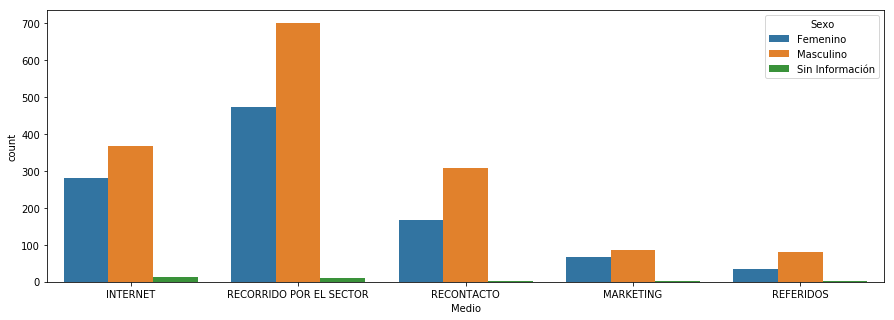

In [495]:
plt.figure(figsize=(15,5))
sns.countplot(data_coti['Medio'], hue= data_coti['Sexo']) 


In [ ]:
plt.figure(figsize=(15,5))

altos_coti['Tipo de Medio'].value_counts()[:6].plot(kind='bar')

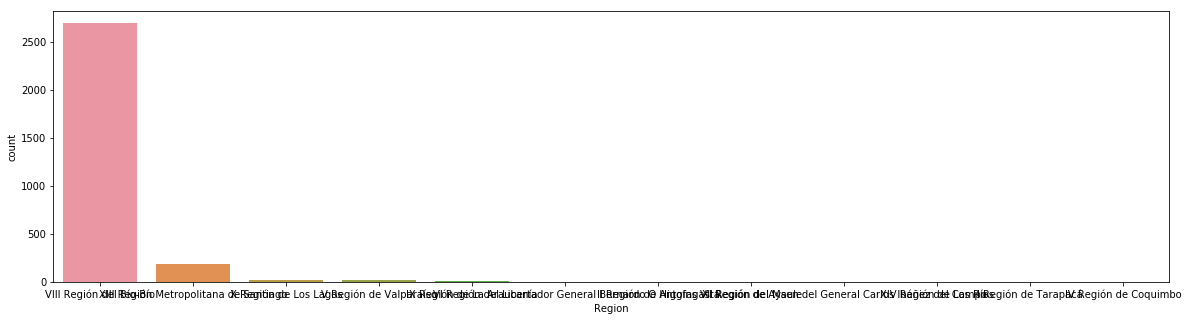

In [109]:
plt.figure(figsize=(20,5))
sns.countplot(data_coti['Region'], order = data_coti['Region'].value_counts().index)

In [8]:
print('Hay ' + str(altos_coti['Productos'].nunique()) + ' Productos diferentes en este proyecto')
print('\n')
print('jo')

Hay 263 Productos diferentes en este proyecto


jo


In [35]:
#explore telefono and celular
altos_coti['Telefono'] = altos_coti['Telefono'].apply(lambda x: 0 if pd.isnull(x) else 1)
altos_coti['Celular'] = altos_coti['Celular'].apply(lambda x: 0 if pd.isnull(x) else 1)